<a href="https://colab.research.google.com/github/anonymousgeek17/Image-Classification-using-Deep-Learning/blob/main/Birds_ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached kaggle-1.5.12-py3-none-any.whl
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
!kaggle datasets list

ref                                                       title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ruchi798/data-science-job-salaries                        Data Science Job Salaries                            7KB  2022-06-15 08:59:12           7768        262  1.0              
surajjha101/bigbasket-entire-product-list-28k-datapoints  BigBasket Entire Product List (~28K datapoints)      6MB  2022-06-22 12:51:18           2757        112  1.0              
victorsoeiro/netflix-tv-shows-and-movies                  Netflix TV Shows and Movies                          2MB  2022-05-15 00:01:23          17606        504  1.0              
sameepvani/nasa-nearest-earth-objects                     NASA - Nearest Earth Objects         

In [ ]:
#Specific Dataset
!kaggle datasets list -s 'birds species classification'

ref                                                    title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpiosenka/100-bird-species                             BIRDS 400 - SPECIES IMAGE CLASSIFICATION            1GB  2022-02-17 15:49:59          28333        789  0.85294116       
agajorte/zoo-animals-extended-dataset                  Zoo Animals Extended Dataset                        2KB  2019-06-02 16:22:31           4337        105  1.0              
zhangjuefei/birds-bones-and-living-habits              Birds' Bones and Living Habits                     10KB  2017-01-18 03:53:49           3386         71  0.88235295       
kedarsai/bird-species-classification-220-categories    Bird Species Classification 200 Categories          1GB  202

In [ ]:
!kaggle datasets download -d gpiosenka/100-bird-species

100% 1.49G/1.49G [00:13<00:00, 74.9MB/s]
100% 1.49G/1.49G [00:13<00:00, 122MB/s] 


In [ ]:
!unzip *.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/VERMILION FLYCATHER/102.jpg  
  inflating: train/VERMILION FLYCATHER/103.jpg  
  inflating: train/VERMILION FLYCATHER/104.jpg  
  inflating: train/VERMILION FLYCATHER/105.jpg  
  inflating: train/VERMILION FLYCATHER/106.jpg  
  inflating: train/VERMILION FLYCATHER/107.jpg  
  inflating: train/VERMILION FLYCATHER/108.jpg  
  inflating: train/VERMILION FLYCATHER/109.jpg  
  inflating: train/VERMILION FLYCATHER/110.jpg  
  inflating: train/VERMILION FLYCATHER/111.jpg  
  inflating: train/VERMILION FLYCATHER/112.jpg  
  inflating: train/VERMILION FLYCATHER/113.jpg  
  inflating: train/VERMILION FLYCATHER/114.jpg  
  inflating: train/VERMILION FLYCATHER/115.jpg  
  inflating: train/VERMILION FLYCATHER/116.jpg  
  inflating: train/VERMILION FLYCATHER/117.jpg  
  inflating: train/VERMILION FLYCATHER/118.jpg  
  inflating: train/VERMILION FLYCATHER/119.jpg  
  inflating: train/VERMILION FLYCATHER/120.jpg  
  inflating: train

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
import os 
import glob
import tqdm
import tensorflow
import keras

from tqdm import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

from keras.preprocessing.image import load_img,img_to_array
from keras.applications.vgg16 import preprocess_input

%matplotlib inline

In [ ]:
#tensorflow.__version__

In [ ]:
keras.backend.backend()

'tensorflow'

In [ ]:
keras.__version__

'2.8.0'

Viewing PreProcessing Dataset

In [ ]:
generator = ImageDataGenerator()
batches   = generator.flow_from_directory('/content/train')

Found 58388 images belonging to 400 classes.


In [ ]:
indices = batches.class_indices

labels  = list(indices.keys())
labels

['ABBOTTS BABBLER',
 'ABBOTTS BOOBY',
 'ABYSSINIAN GROUND HORNBILL',
 'AFRICAN CROWNED CRANE',
 'AFRICAN EMERALD CUCKOO',
 'AFRICAN FIREFINCH',
 'AFRICAN OYSTER CATCHER',
 'ALBATROSS',
 'ALBERTS TOWHEE',
 'ALEXANDRINE PARAKEET',
 'ALPINE CHOUGH',
 'ALTAMIRA YELLOWTHROAT',
 'AMERICAN AVOCET',
 'AMERICAN BITTERN',
 'AMERICAN COOT',
 'AMERICAN GOLDFINCH',
 'AMERICAN KESTREL',
 'AMERICAN PIPIT',
 'AMERICAN REDSTART',
 'AMETHYST WOODSTAR',
 'ANDEAN GOOSE',
 'ANDEAN LAPWING',
 'ANDEAN SISKIN',
 'ANHINGA',
 'ANIANIAU',
 'ANNAS HUMMINGBIRD',
 'ANTBIRD',
 'ANTILLEAN EUPHONIA',
 'APAPANE',
 'APOSTLEBIRD',
 'ARARIPE MANAKIN',
 'ASHY THRUSHBIRD',
 'ASIAN CRESTED IBIS',
 'AVADAVAT',
 'AZURE JAY',
 'AZURE TANAGER',
 'AZURE TIT',
 'BAIKAL TEAL',
 'BALD EAGLE',
 'BALD IBIS',
 'BALI STARLING',
 'BALTIMORE ORIOLE',
 'BANANAQUIT',
 'BAND TAILED GUAN',
 'BANDED BROADBILL',
 'BANDED PITA',
 'BANDED STILT',
 'BAR-TAILED GODWIT',
 'BARN OWL',
 'BARN SWALLOW',
 'BARRED PUFFBIRD',
 'BARROWS GOLDENEYE',
 'BAY-B

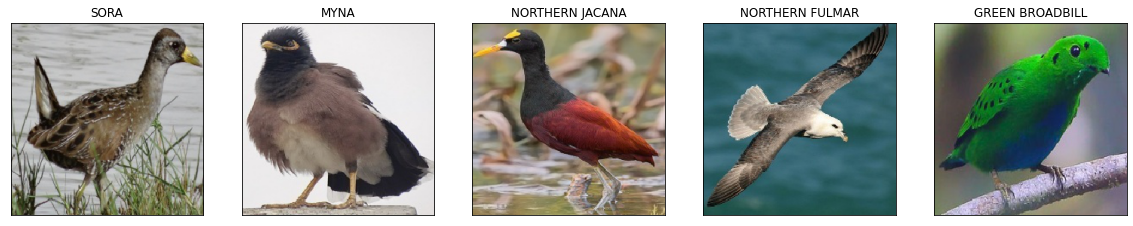

In [ ]:
#Visuals of Random Batch
for X, y in batches:
    fig, ax = plt.subplots(1, 5, figsize=(20, 20))
    
    for i in range(0,5):
        img = X[i].astype('int')
        label = labels[np.argmax(y[i])]
        ax[i].imshow(img)
        ax[i].set_title(label)
        ax[i].set_xticks([])
        ax[i].set_yticks([])

    
    plt.show()
    break

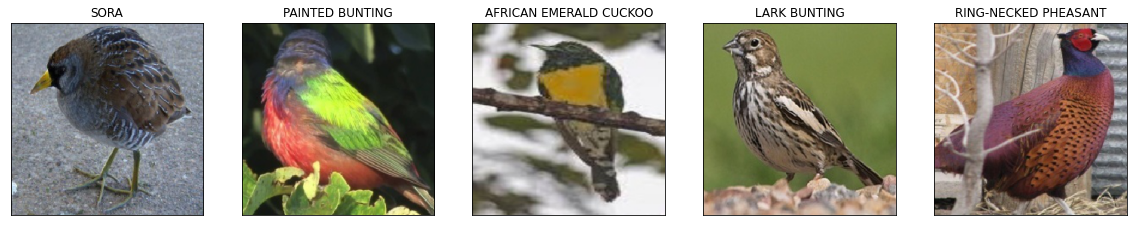

In [ ]:
#Visuals of Random Batch
for X, y in batches:
    fig, ax = plt.subplots(1, 5, figsize=(20, 20))
    
    for i in range(0,5):
        img = X[i].astype('int')
        label = labels[np.argmax(y[i])]
        ax[i].imshow(img)
        ax[i].set_title(label)
        ax[i].set_xticks([])
        ax[i].set_yticks([])

    
    plt.show()
    break

Data Augmentation

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   zoom_range=0.2,
                                   shear_range=0.2,
                                   rotation_range=30,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale = 1/255)

test_datagen  = ImageDataGenerator(rescale = 1/255)

In [ ]:
# Reading Directories 

train_directory = '/content/train'
val_directory   = '/content/valid'
test_directory  = '/content/test'

In [ ]:
train_generator=train_datagen.flow_from_directory(train_directory,
                                                  target_size=(224,224),
                                                  color_mode='rgb',
                                                  class_mode='sparse',
                                                  batch_size=256)

Found 58388 images belonging to 400 classes.


In [ ]:
val_generator=valid_datagen.flow_from_directory(val_directory,
                                               target_size=(224,224),
                                               color_mode='rgb',
                                               class_mode='sparse',
                                               batch_size=256)

Found 2000 images belonging to 400 classes.


In [ ]:
test_gemerator=test_datagen.flow_from_directory(test_directory,
                                                target_size=(224,224),
                                                color_mode='rgb',
                                                class_mode='sparse',
                                                batch_size=256)

Found 2000 images belonging to 400 classes.


Model Building

In [ ]:
# Model Initialization

from keras.applications.inception_resnet_v2 import InceptionResNetV2

base_model = InceptionResNetV2(input_shape=(224,224,3),
                               weights='imagenet',
                               include_top=False)

219070464/219055592 [==============================] - 1s 0us/step


In [ ]:
# Freezing Layers
for layer in base_model.layers:
    layer.trainable=False

In [ ]:
#model=Sequential()
#model.add(Flatten(input_shape=[28,28]))
#model.add(Dense(20, activation='relu'))
#model.add(Dense(28, activation='softmax'))

In [ ]:
# Building Model
model=Sequential()
model.add(base_model)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1024,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(255,activation='softmax'))

In [ ]:
# Summary of the Model
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 5, 5, 1536)       54336736  
 onal)                                                           
                                                                 
 dropout (Dropout)           (None, 5, 5, 1536)        0         
                                                                 
 flatten_4 (Flatten)         (None, 38400)             0         
                                                                 
 batch_normalization_203 (Ba  (None, 38400)            153600    
 tchNormalization)                                               
                                                                 
 dense_7 (Dense)             (None, 2048)              78645248  
                                                                 
 batch_normalization_204 (Ba  (None, 2048)            

In [ ]:
# Model Compile

#opt=tensorflow.keras.optimizers.Adam(lr=0.001)

#model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True),  #loss='sparse_categorical_crossentropy', 'binary_crossentropy'
 #             metrics=['accuracy'],
  #            optimizer=opt)

In [ ]:
#Compiling the Model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
#model.fit(train_generator)

In [ ]:
import os 
os.getcwd()

'/content'

In [ ]:
# Define Callbacks 
filepath = './best_weights.hdf5'

earlystopping = EarlyStopping(monitor = 'val_accuracy', 
                             mode = 'max' , 
                              patience = 10,
                              verbose = 1)

checkpoint    = ModelCheckpoint(filepath, 
                                monitor = 'val_accuracy', 
                                mode='max', 
                                save_best_only=True, 
                                verbose = 1)

callback_list = [earlystopping, checkpoint]

In [ ]:
# Model Fitting 
#import keras.utils
model_history=model.fit(train_generator,
                        validation_data=val_generator,
                        epochs = 500,
                        callbacks = callback_list,
                        verbose = 1)

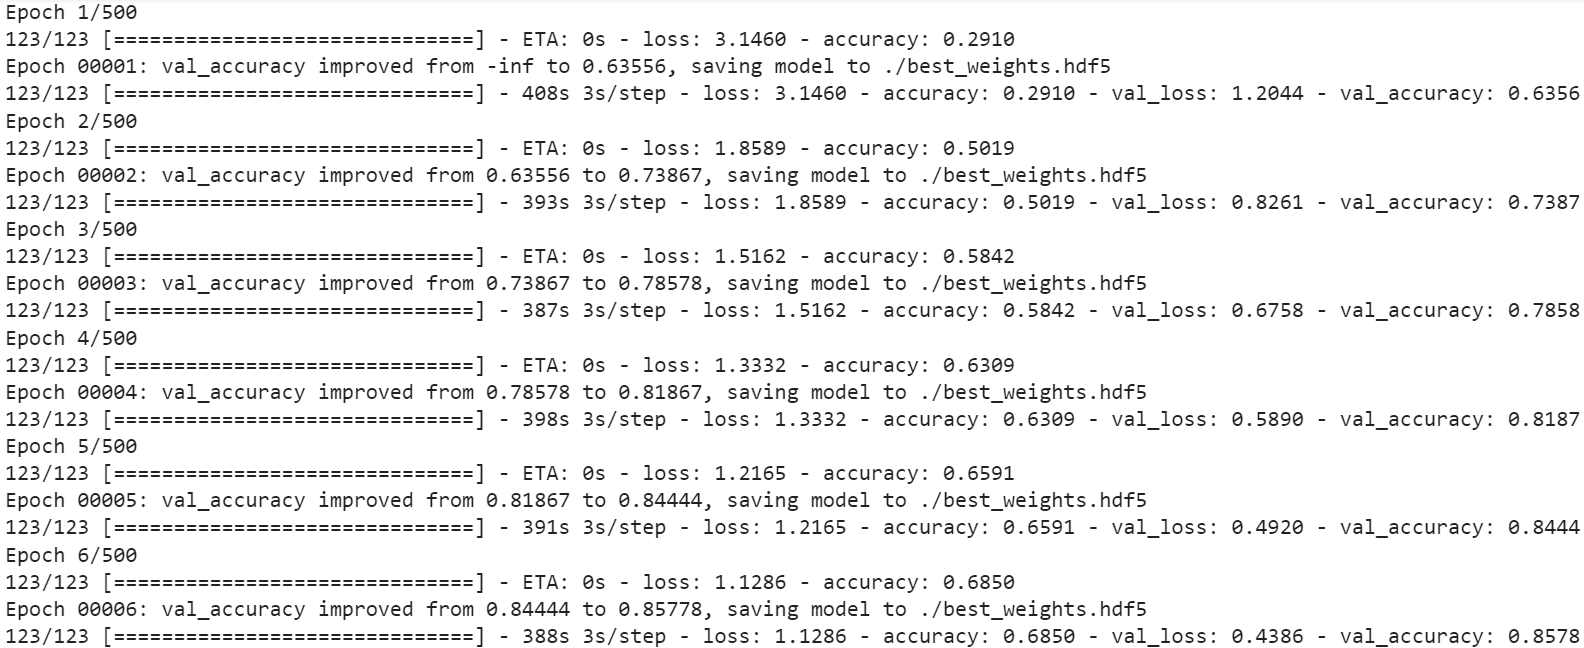
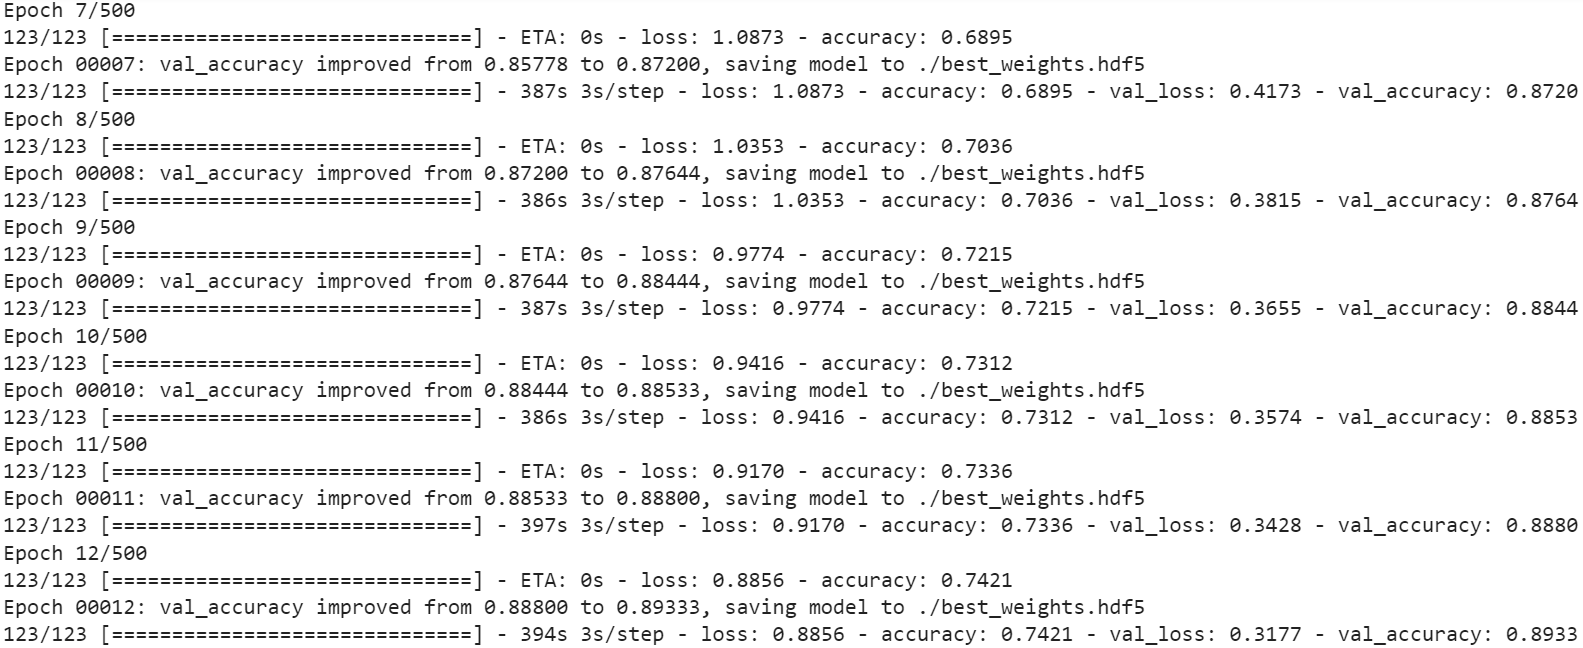
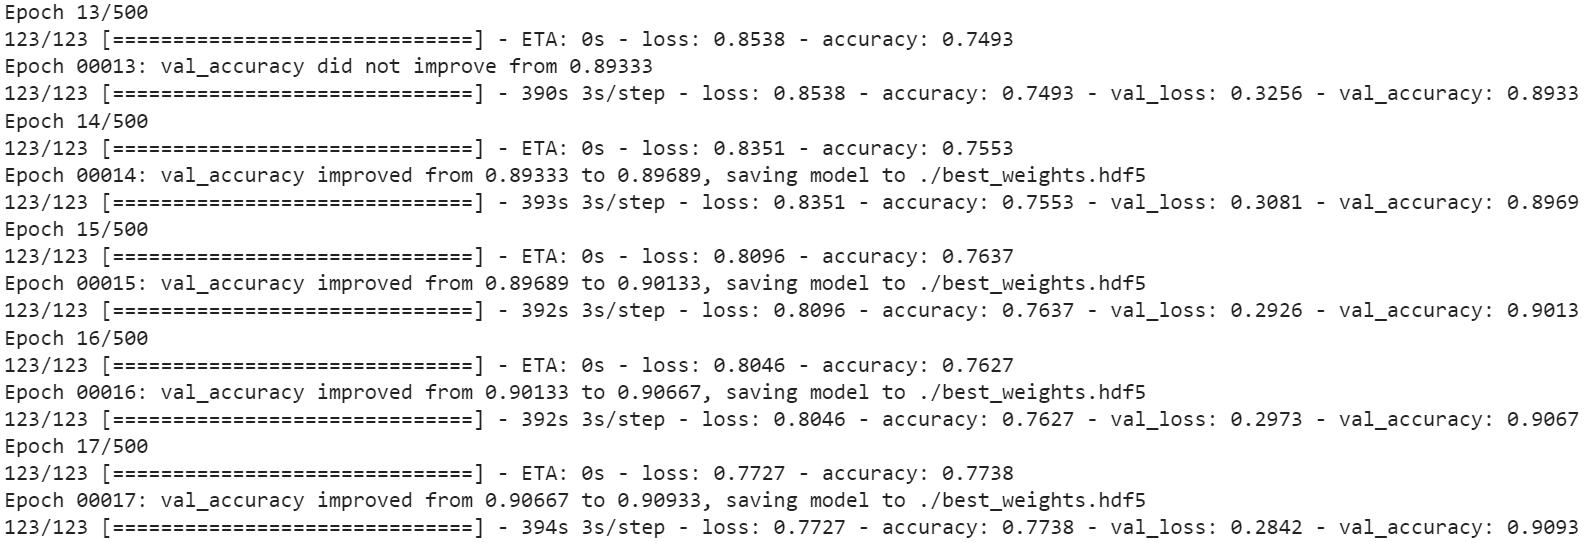
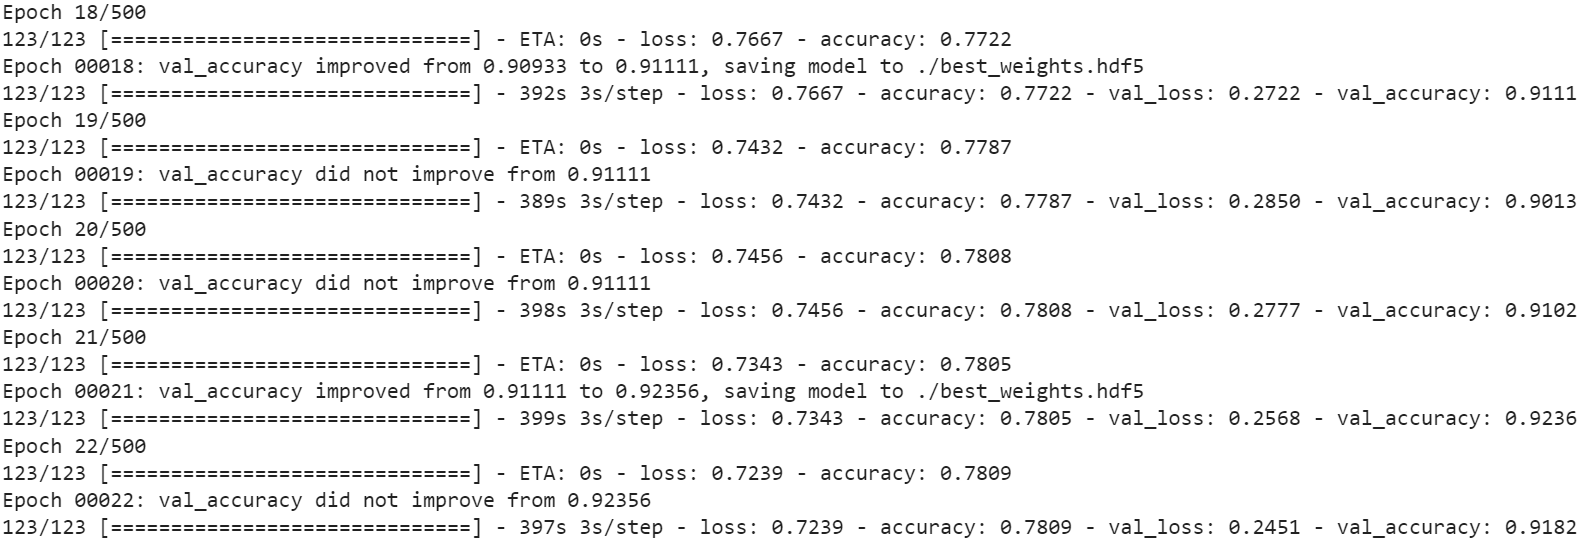
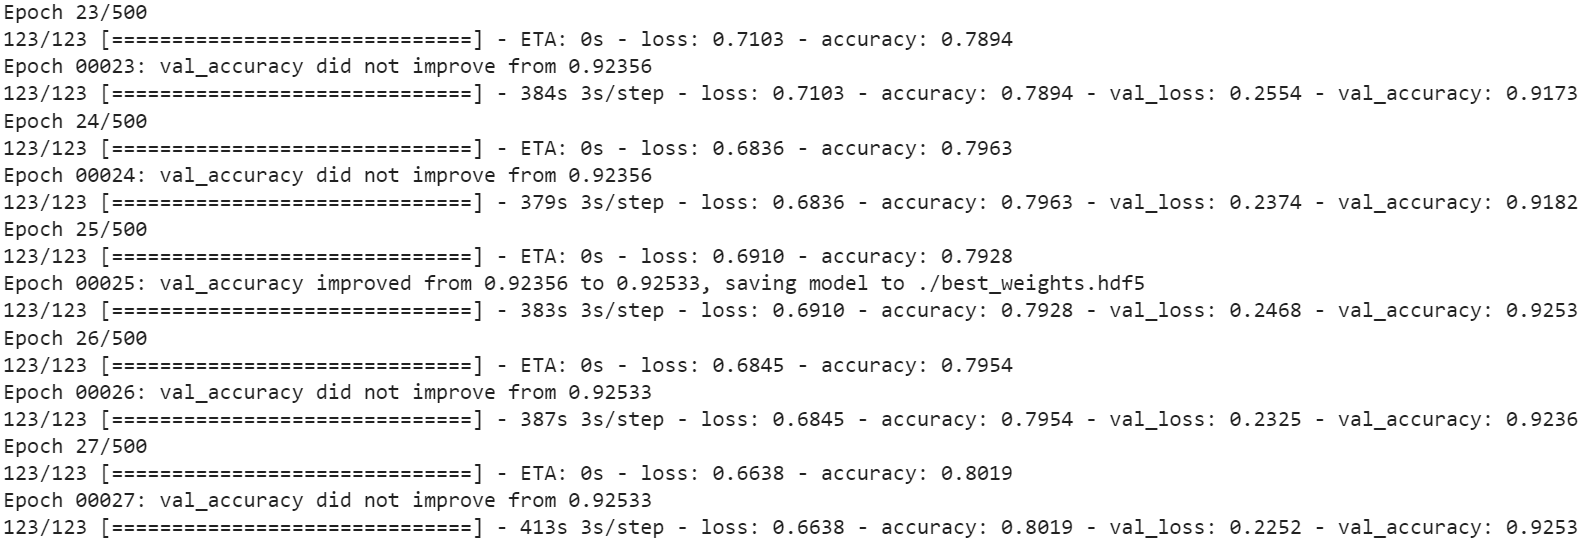
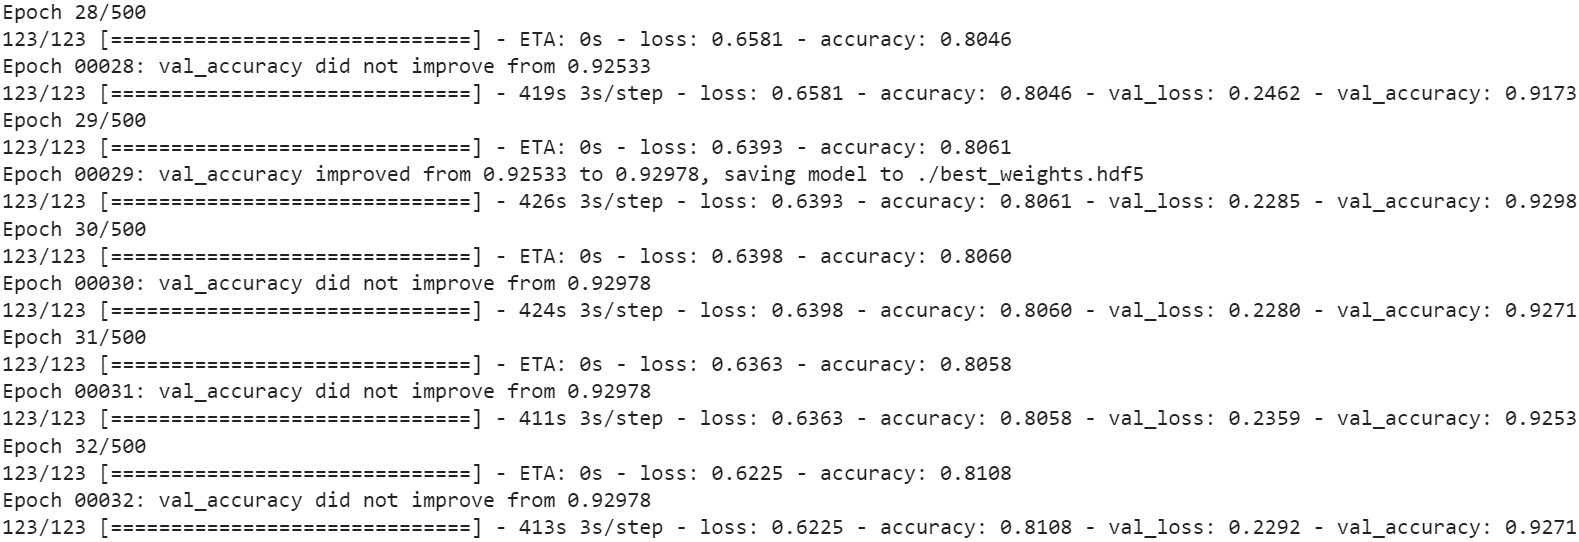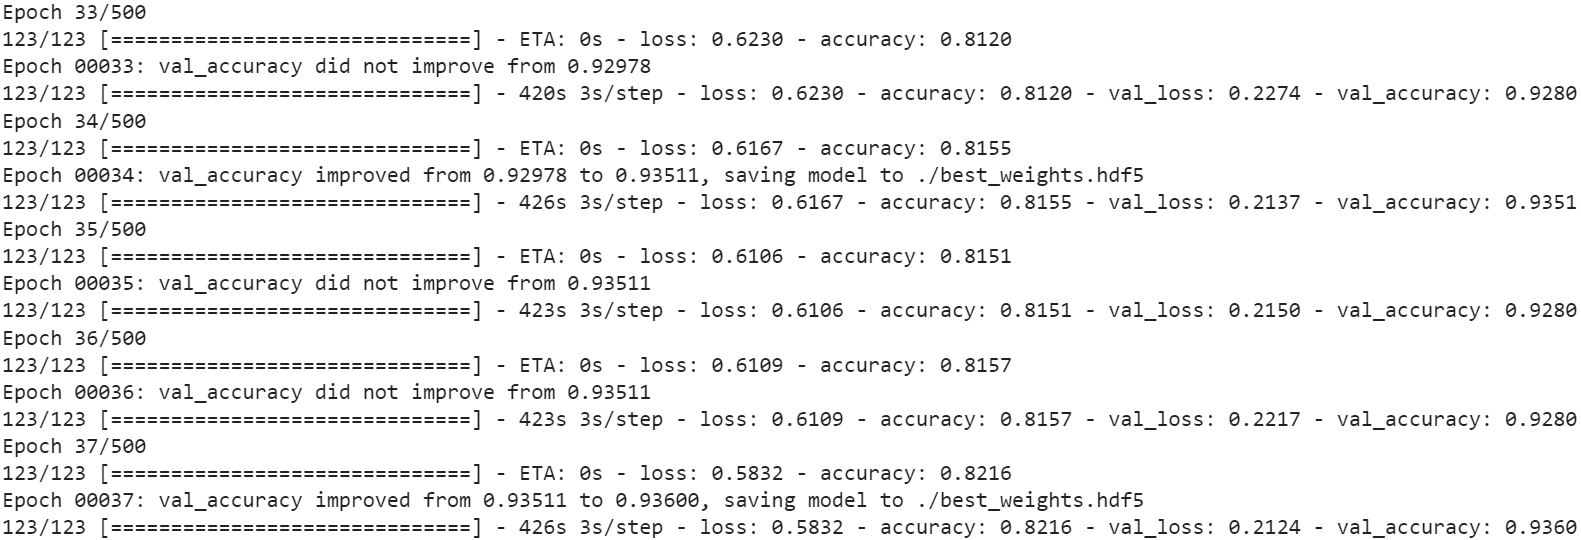
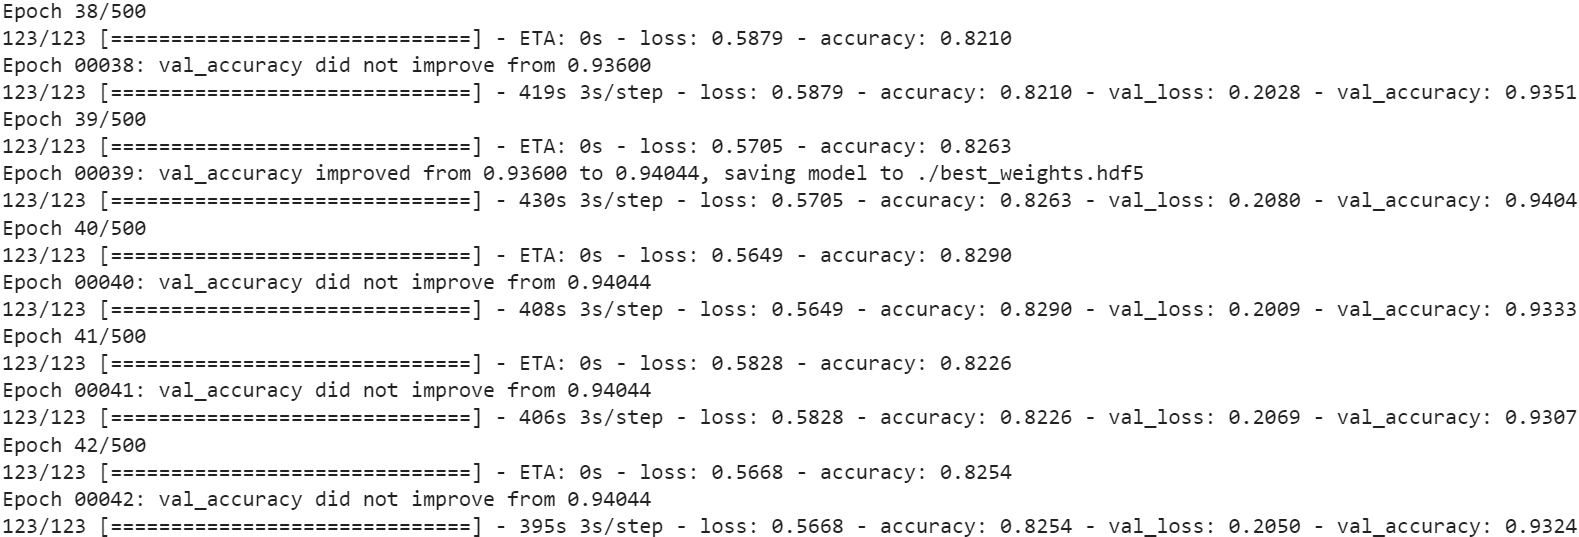
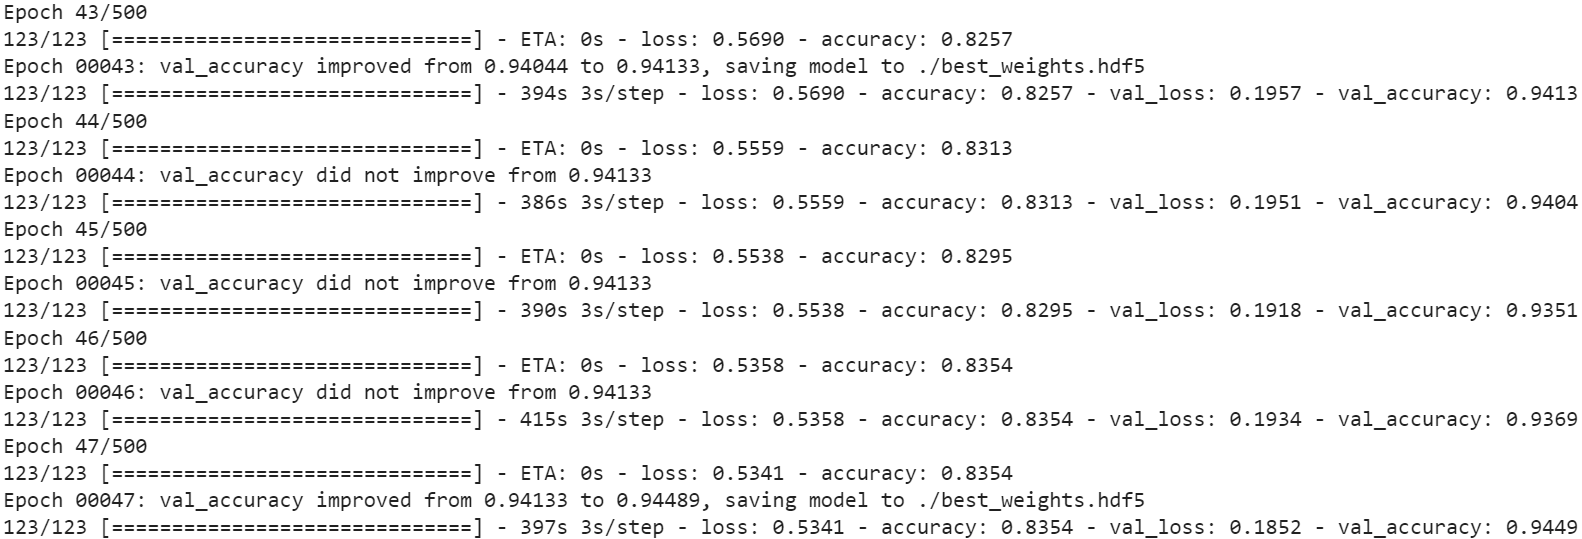
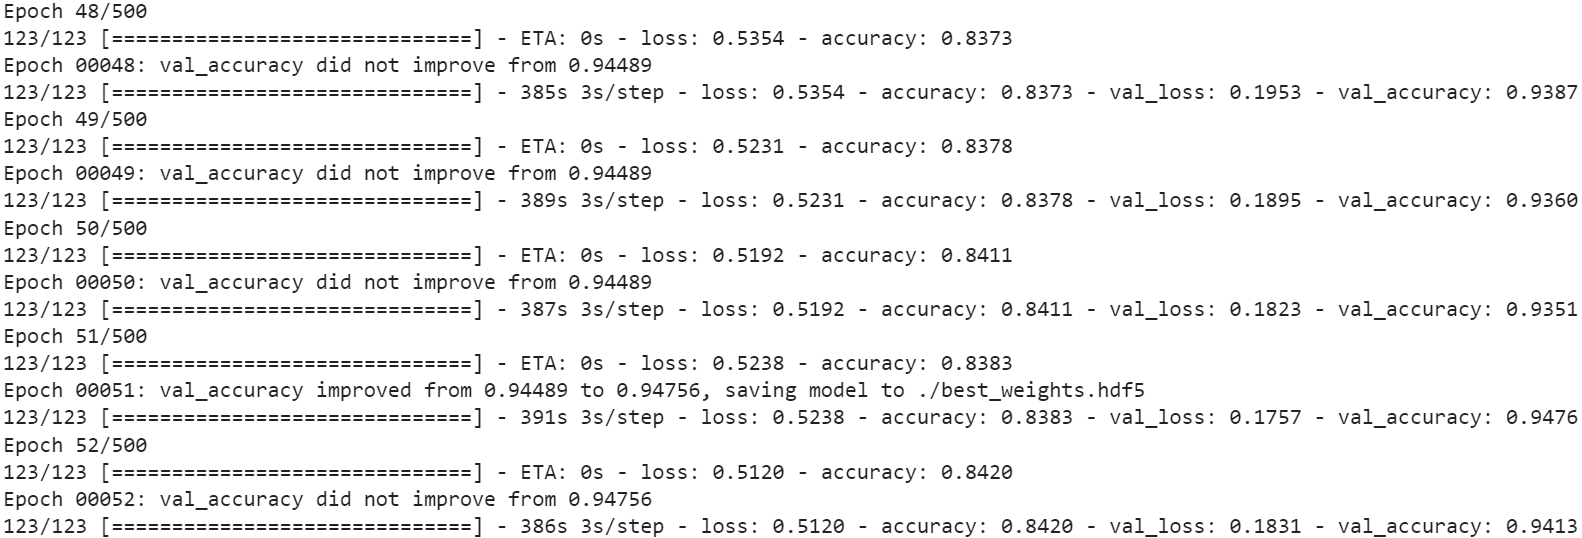
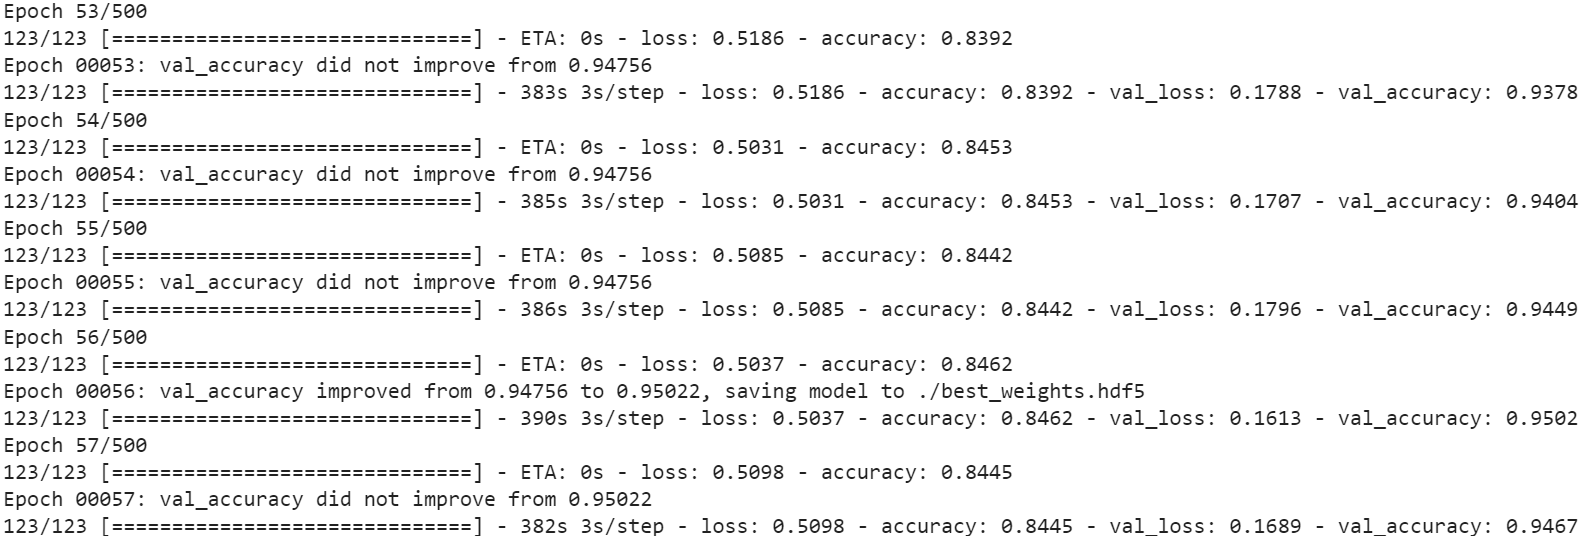
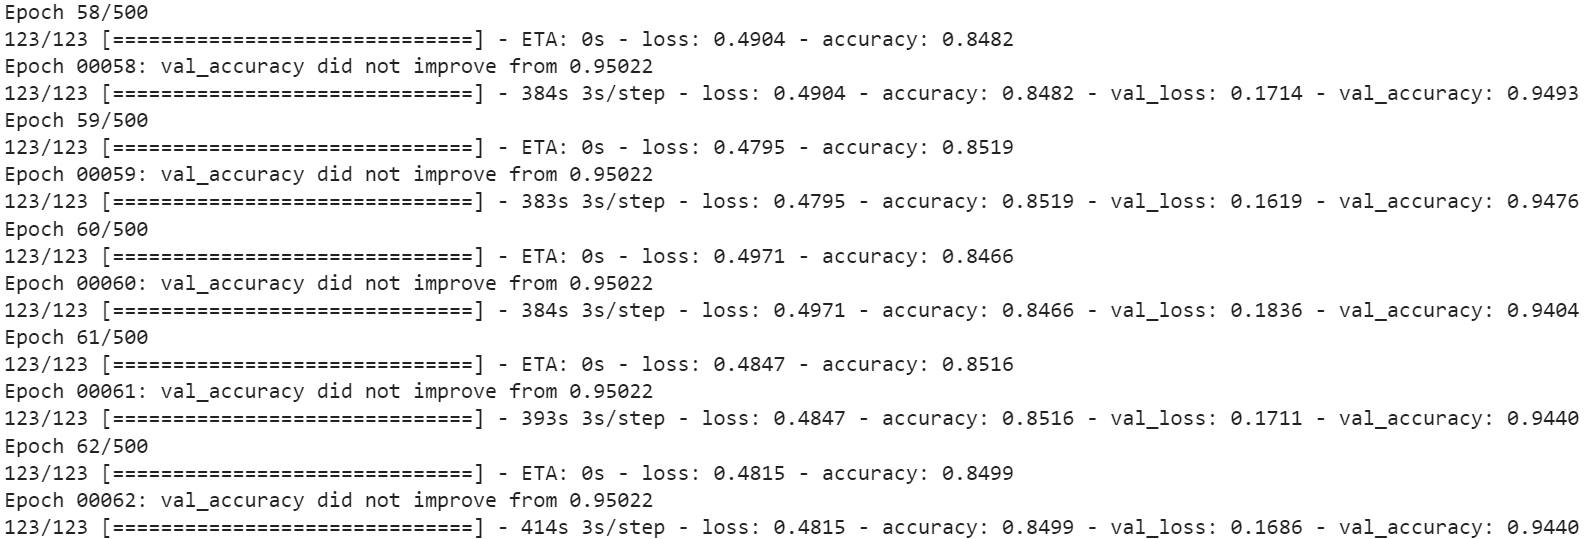
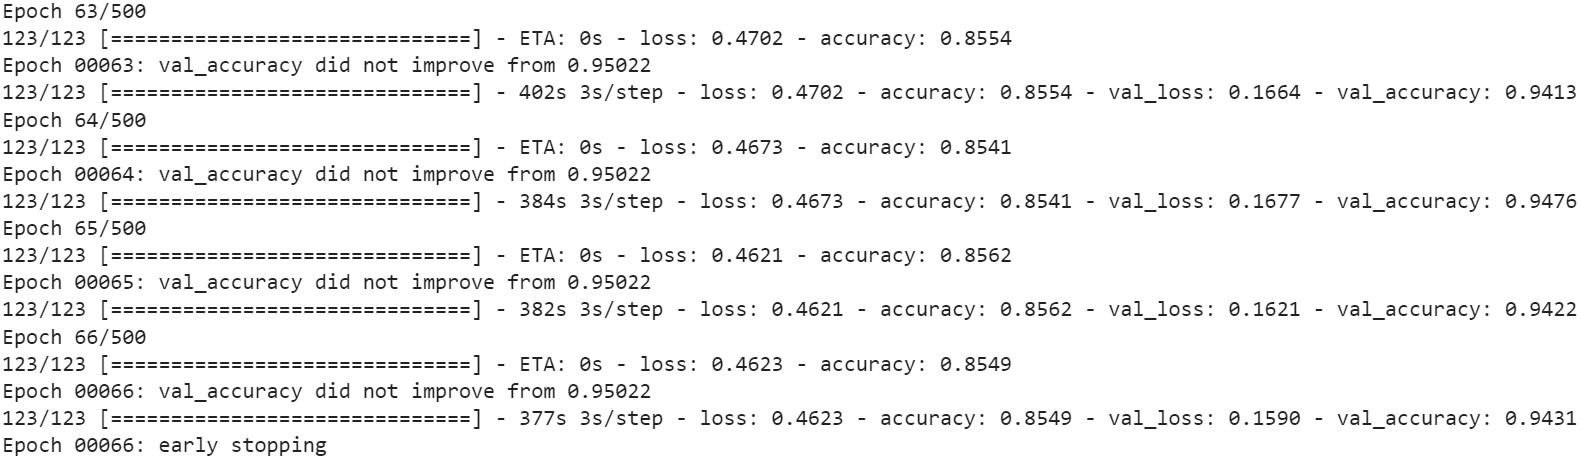

Model Evaluation

In [ ]:
plt.plot(model.history.history['accuracy'],c='red')
plt.plot(model.history.history['val_accuracy'],c='green')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left', bbox_to_anchor = (1,1))

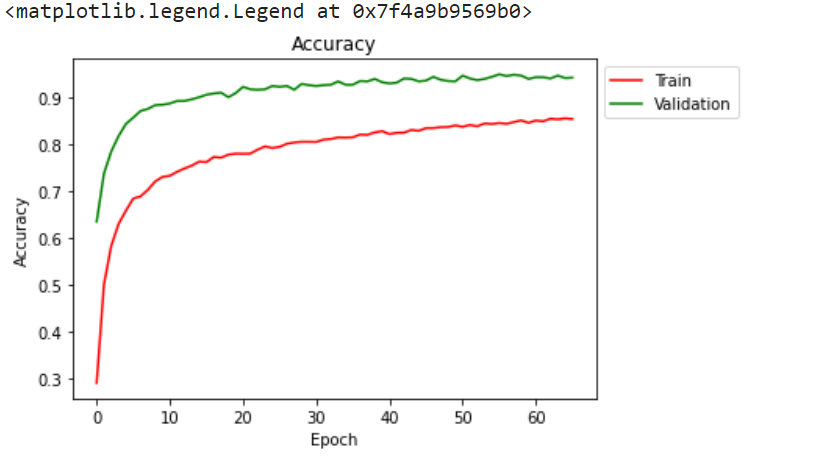

In [ ]:
plt.plot(model.history.history['loss'],c='red')
plt.plot(model.history.history['val_loss'],c='green')
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left', bbox_to_anchor=(1,1))

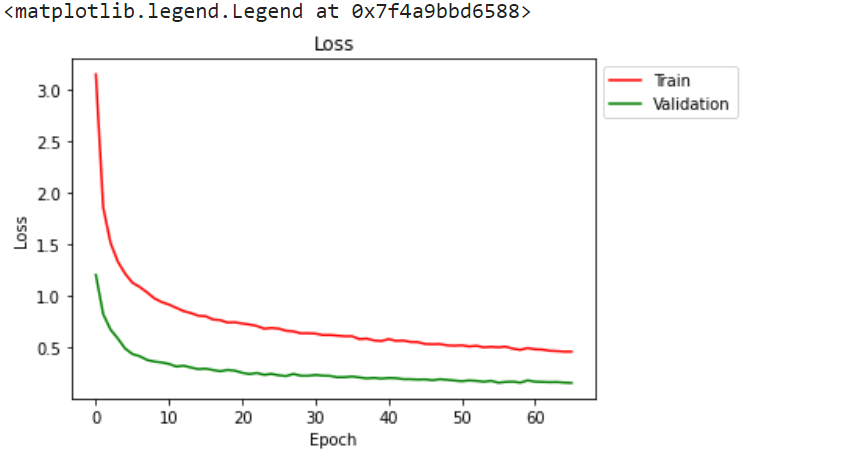

In [ ]:
# Evaluating the test data 
model.evaluate(test_generator)

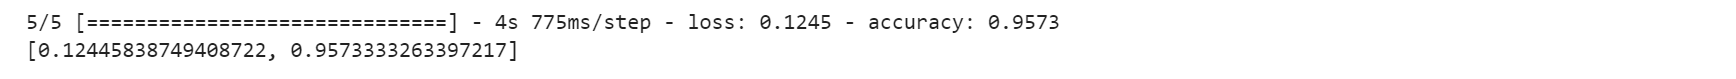

In [ ]:
# Testing

dic=test_gemerator.class_indices
icd={k:v for v,k in dic.items()}
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict_classes(img)
    probability=round(np.max(model.predict_proba(img)*100),2)
    print (probability, ' % chances are there that the bird is',icd[answer[0]])

In [ ]:
img='/content/test/ALBATROSS/1.jpg'
pic=load_img('/content/test/ALBATROSS/1.jpg',target_size=(224,224,3))
plt.imshow(pic)
output(img)

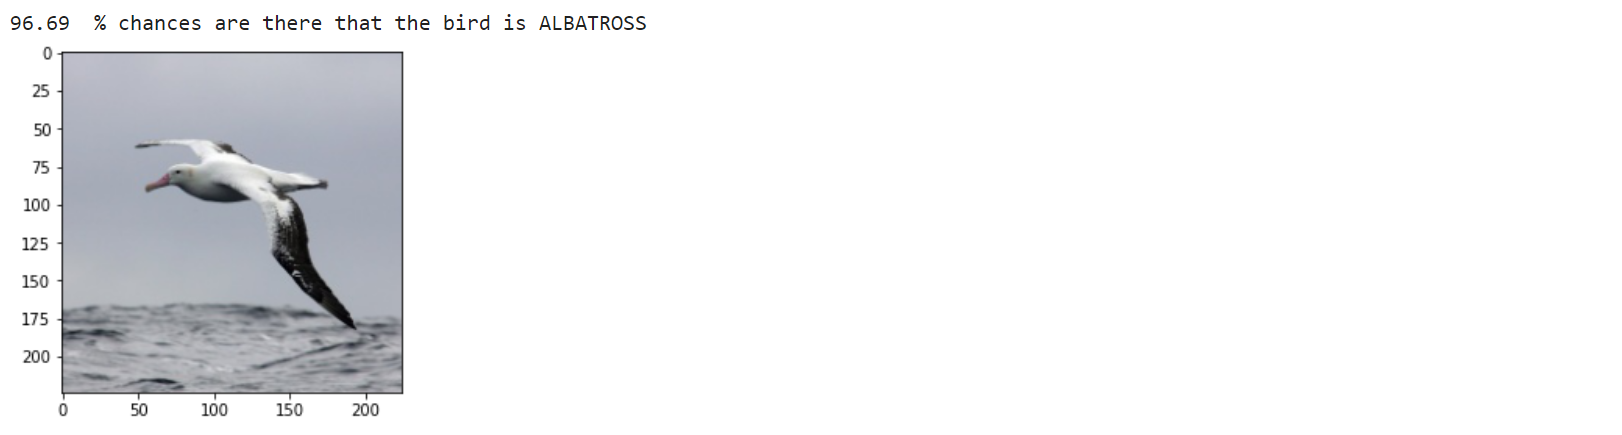

In [ ]:
img='/content/test/ANTBIRD/5.jpg'
pic=load_img('/content/test/ANTBIRD/5.jpg',target_size=(224,224,3))
plt.imshow(pic)
output(img)

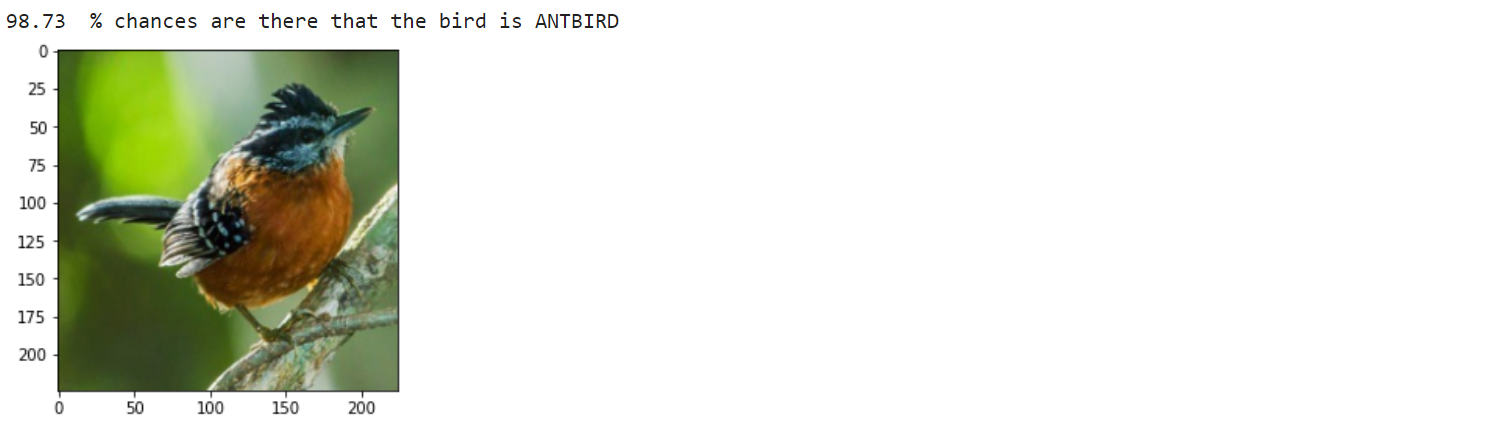